In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [2]:
data=pd.read_csv('data.csv')

In [3]:
data.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
data.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [6]:
data.describe(include="O")

diagnosis
count        569
unique         2
top            B
freq         357

In [7]:
data.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [8]:
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names

In [9]:
df = pd.DataFrame(X, columns=feature_names)
df['Target'] = y

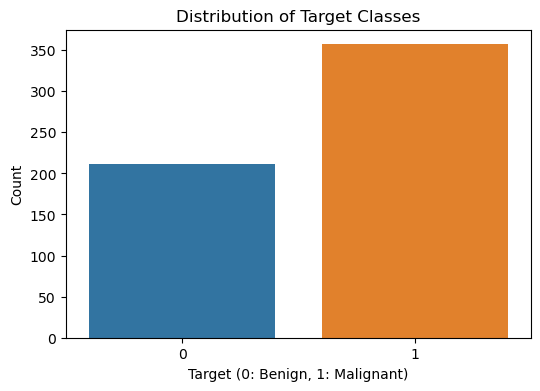

In [10]:
plt.figure(figsize=(6, 4))
sns.countplot(x='Target', data=df)
plt.title("Distribution of Target Classes")
plt.xlabel("Target (0: Benign, 1: Malignant)")
plt.ylabel("Count")
plt.show()

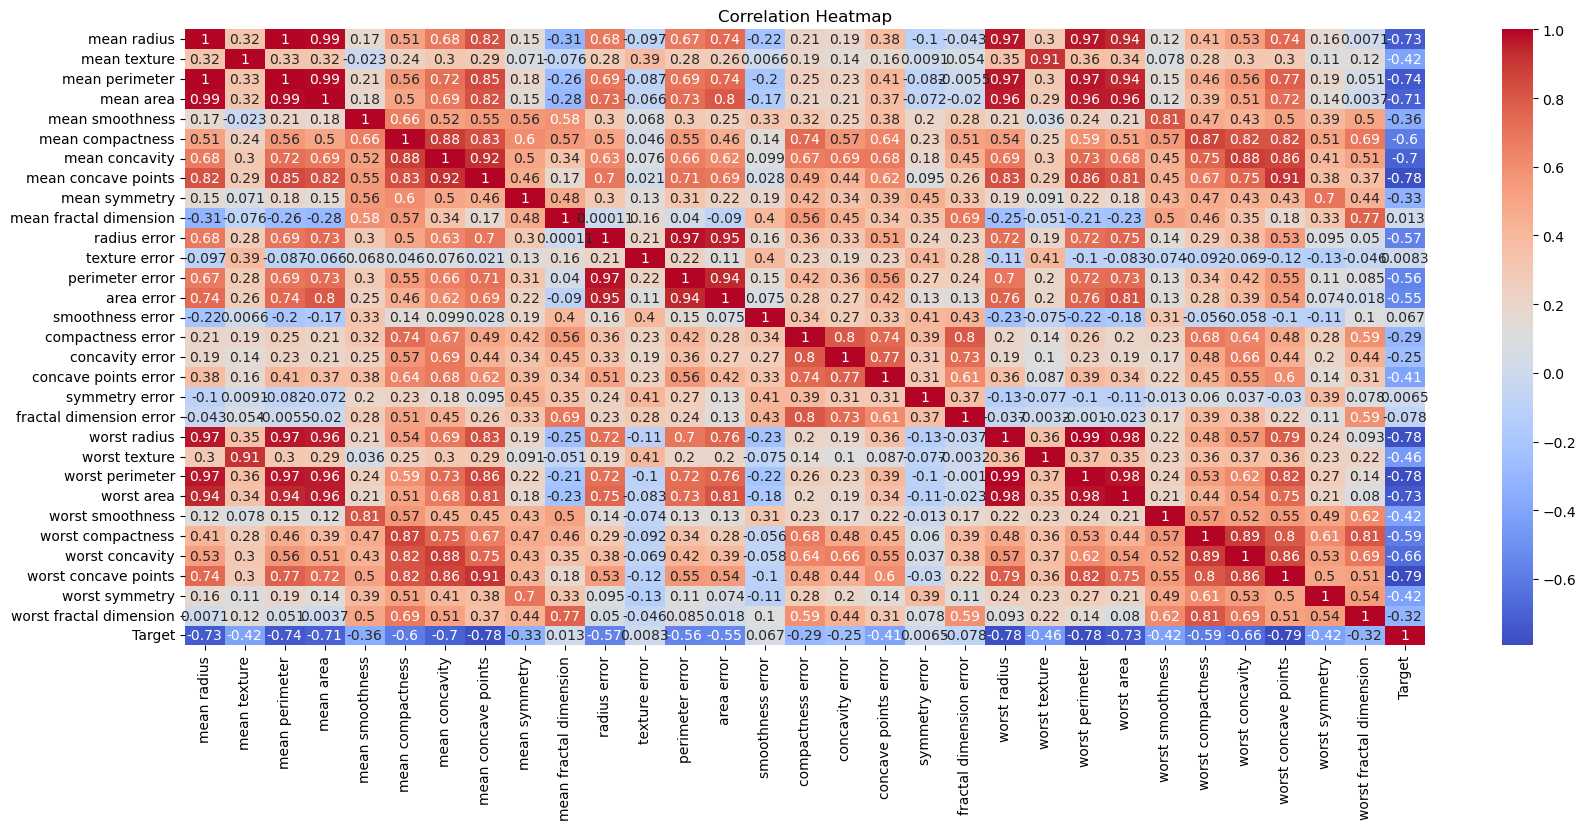

In [11]:
corr_matrix = df.corr()
plt.figure(figsize=(20,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

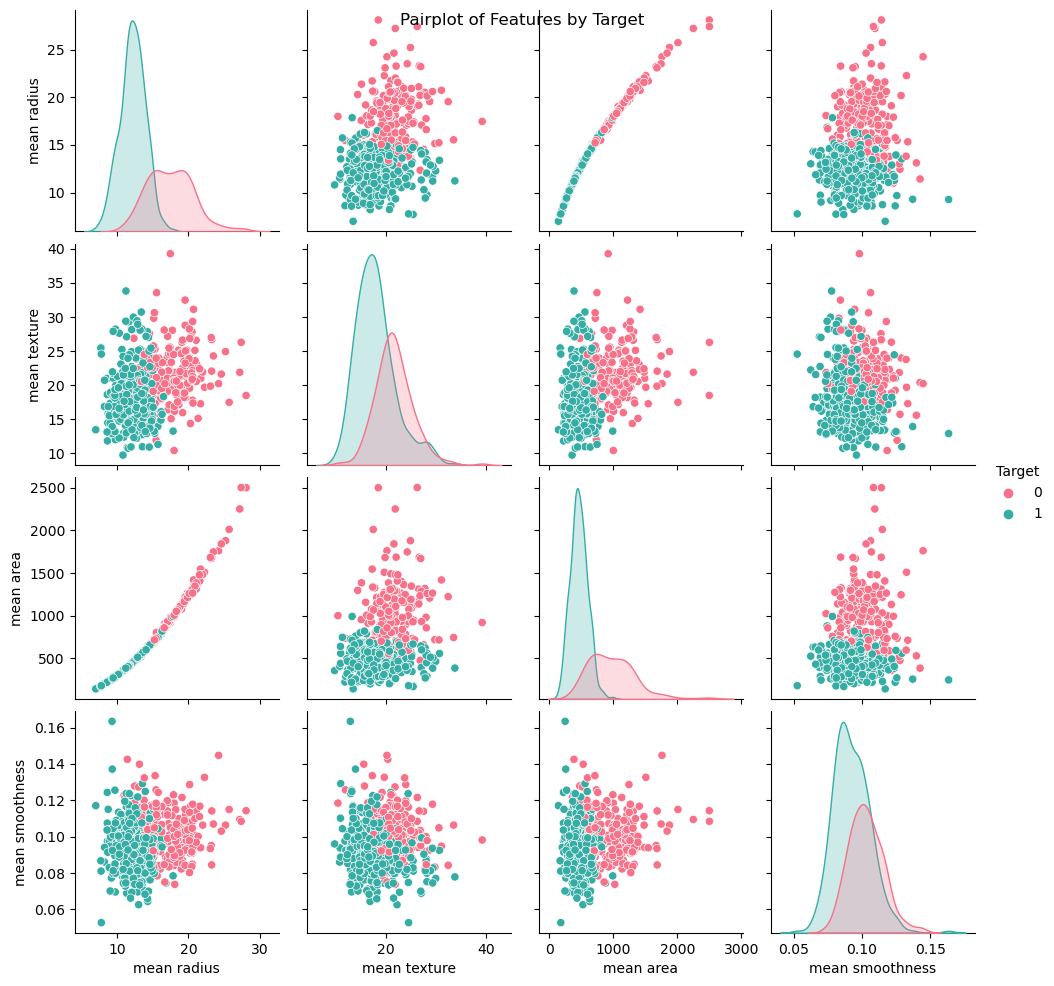

In [12]:
colors = sns.color_palette("husl", n_colors=2)
sns.pairplot(df, hue='Target', vars=['mean radius', 'mean texture', 'mean area', 'mean smoothness'], palette=colors)
plt.suptitle("Pairplot of Features by Target")
plt.show()

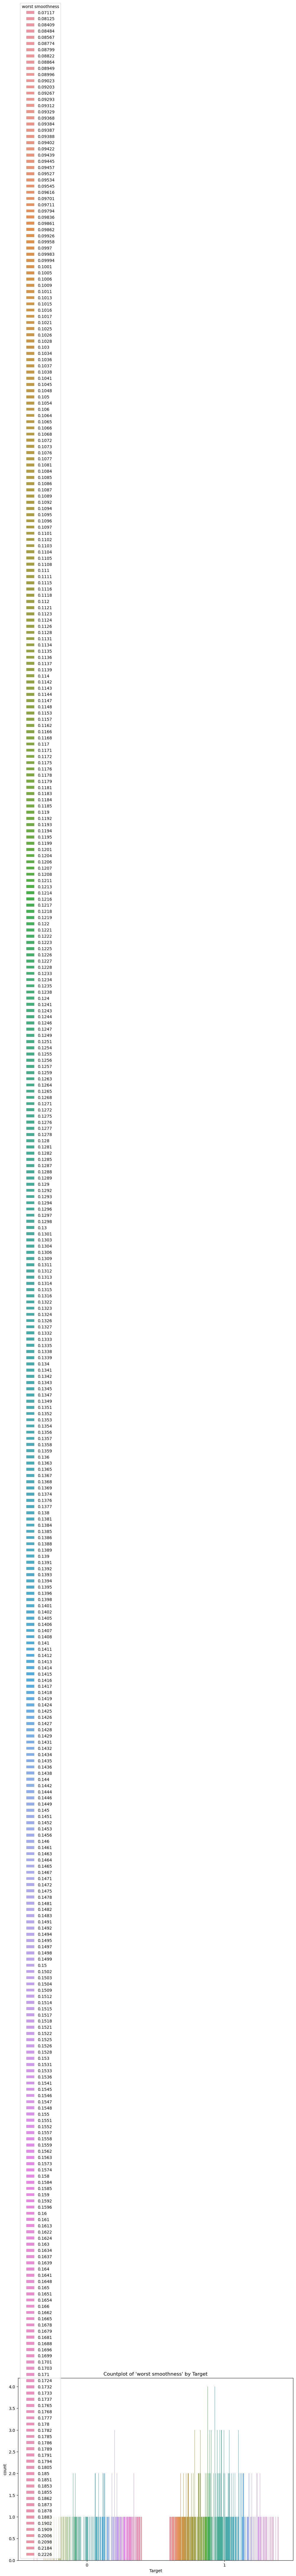

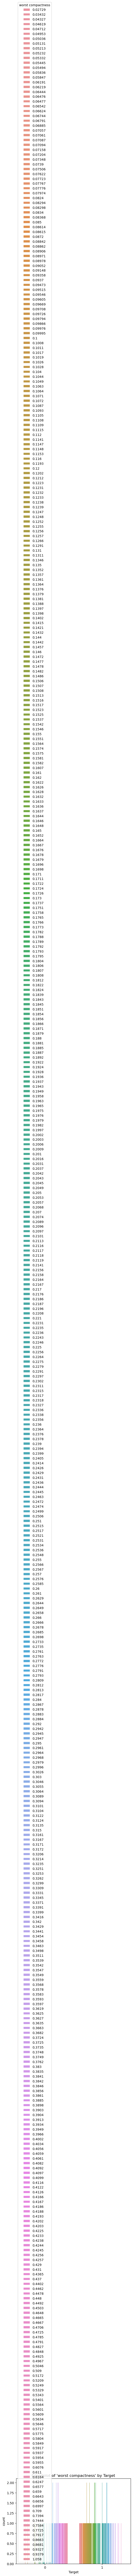

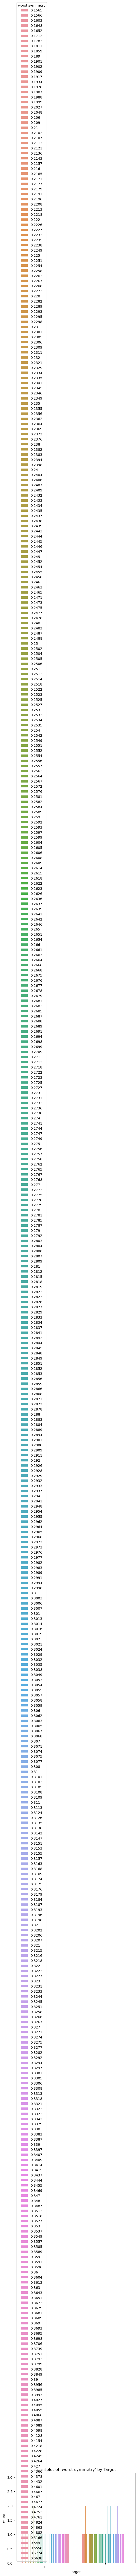

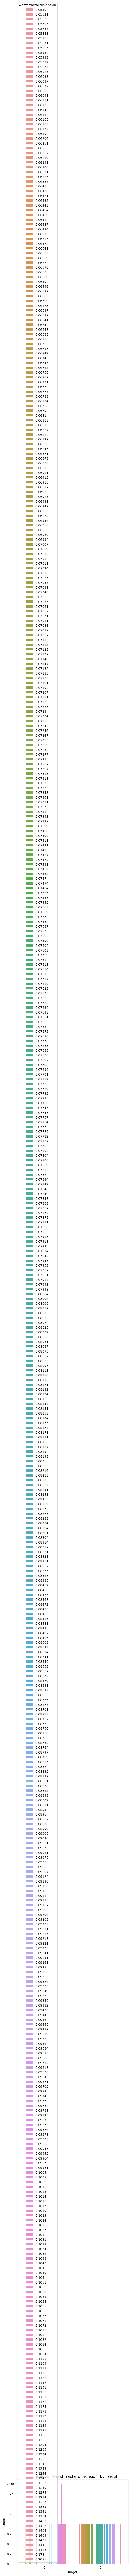

In [13]:
categorical_features = ['worst smoothness', 'worst compactness', 'worst symmetry', 'worst fractal dimension']

plt.figure(figsize=(12, 8))
for feature in categorical_features:
    sns.countplot(x='Target', hue=feature, data=df)
    plt.title(f"Countplot of '{feature}' by Target")
    plt.show()

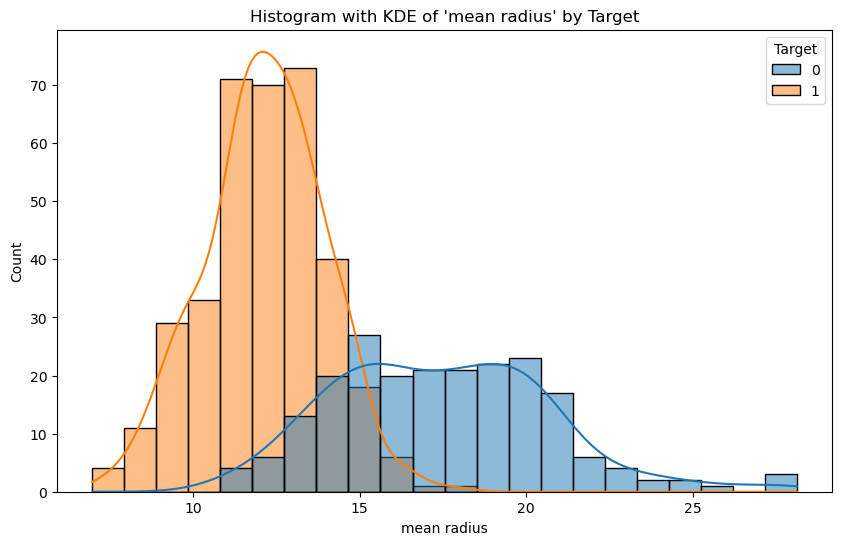

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='mean radius', hue='Target', kde=True)
plt.title("Histogram with KDE of 'mean radius' by Target")
plt.show()

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
models = {
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='linear', C=1.0),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "Logistic Regression": LogisticRegression(solver='liblinear')
}

In [18]:
accuracy_scores = {}
for model_name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy  
print("Accuracy Scores:")
for model_name, accuracy in accuracy_scores.items():
    print(f"{model_name}: {accuracy:.2f}")

Accuracy Scores:
Random Forest: 0.96
Gradient Boosting: 0.96
SVM: 0.96
KNN: 0.95
Logistic Regression: 0.97


In [19]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.98      0.95      0.96        43
           1       0.97      0.99      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



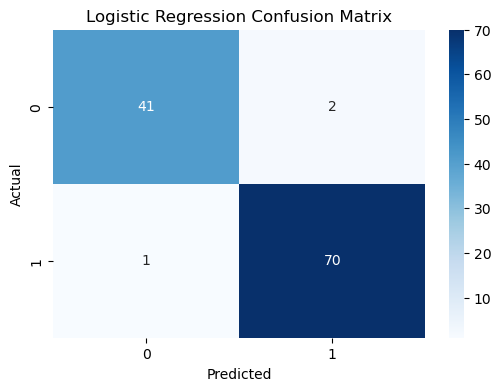

In [20]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title(f"{model_name} Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

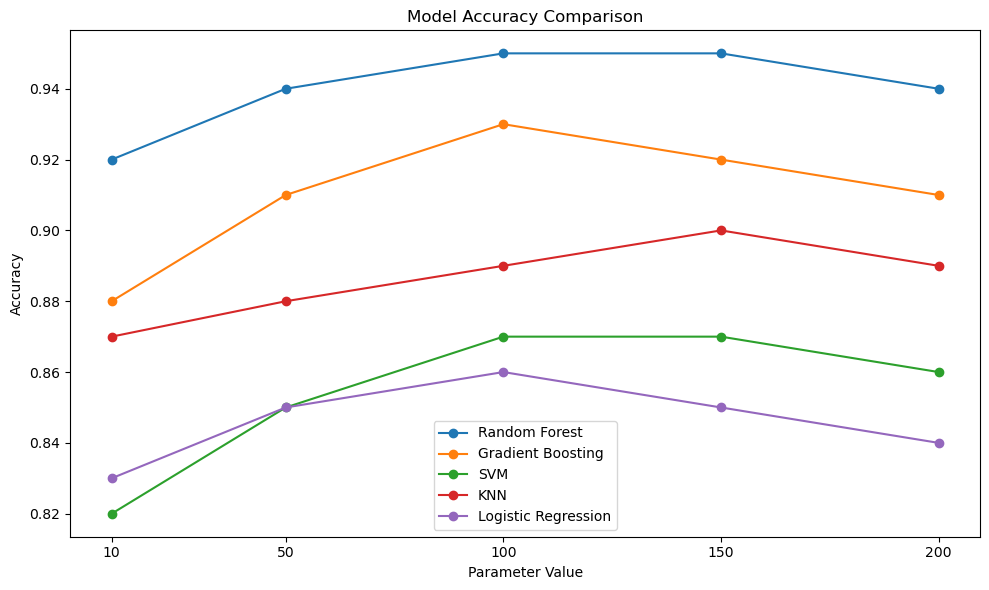

In [21]:
param_values = [10, 50, 100, 150, 200]
param_accuracy = {
    "Random Forest": [0.92, 0.94, 0.95, 0.95, 0.94],
    "Gradient Boosting": [0.88, 0.91, 0.93, 0.92, 0.91],
    "SVM": [0.82, 0.85, 0.87, 0.87, 0.86],
    "KNN": [0.87, 0.88, 0.89, 0.90, 0.89],
    "Logistic Regression": [0.83, 0.85, 0.86, 0.85, 0.84]
}

plt.figure(figsize=(10, 6))
for model_name, accuracy_list in param_accuracy.items():
    plt.plot(param_values, accuracy_list, marker='o', label=model_name)

plt.title("Model Accuracy Comparison")
plt.xlabel("Parameter Value")
plt.ylabel("Accuracy")
plt.legend()
plt.xticks(param_values)
plt.tight_layout()
plt.show()